# PAMAP2_Dataset: Physical Activity Monitoring

**1. Introduction**  
**2. Cleaning**  
**3. Analysis**  
**4. Hypothesis Testing**  
**5. Modelling**  
**6. Conclusion**

<a id='section1'></a>
## Introduction

In this report, we would be investigating and analysing the PAMAP2 dataset. We shall also build models to capture the underlying functions of how various data points can be used to correctly predict activities being carried out.  

The dataset is made up of observations captured through the use of 4 Activity Monitoring sensors. These sensors are attached to the hands, chest, ankle and another to monitor heart rate while performing 12 different physical activities. These readings were taken by having 9 different subjects, 8 men and 1 woman, carry out these various activities while wearing the sensors.  

The goal of this project is draw insights into how measurements and readings taken from the subjects while carrying out the various activities can tell us how active an individual is and use this information into creating a marketable product.  

We will focus on these three targets for this report:  
1. Thoroughly explore data through analysis and appropriately handle missing or dirty data.  

2. Produce and Accept or Reject at least one hypothesis for a relationship between a single pair of attributes.  

3. Develop and test at least one model which uses multiple attributes to make predictions.

In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import legend
from scipy import stats
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/DSRM/Assignments/Coursework/PAMAP2_Dataset/Protocol"

/content/drive/MyDrive/Colab Notebooks/DSRM/Assignments/Coursework/PAMAP2_Dataset/Protocol


In [4]:
!ls

subject101.dat	subject103.dat	subject105.dat	subject107.dat	subject109.dat
subject102.dat	subject104.dat	subject106.dat	subject108.dat


In [5]:
# save file names in directory as list
subject_files = os.listdir()
print(subject_files)

['subject101.dat', 'subject102.dat', 'subject103.dat', 'subject104.dat', 'subject105.dat', 'subject106.dat', 'subject107.dat', 'subject109.dat', 'subject108.dat']


In [6]:
# the main column names
main_col = ['timestamp', 'activityID' , 'heart_rate', 'hand', 'chest', 'ankle']


sub_col = ['temp', 'acc16', 'acc6', 'gyro', 'magnet', 'orient']
column_names = []

for col_name in main_col:
    if ('time' in col_name or 'activity' in col_name or 'heart' in col_name):
        column_names.append(col_name)
    else:
        for i in range(len(sub_col)):
            if i == 0:
                column_names.append(f'{col_name}_temp')
            elif i > 0 and i < 5:
                count = 1
                while count < 4:
                    column_names.append(f'{col_name}_{sub_col[i]}_{count}')
                    count += 1
            else:
                count = 1
                while count < 5:
                    column_names.append(f'{col_name}_{sub_col[i]}_{count}')
                    count += 1

Above we created column names for all 54 columns based on the information provided in the accompanying documents for the dataset. 

In [7]:
# create empty dataframe as main dataframe
imu_data_original = pd.DataFrame()

# create dataframe for each data file and append to main dataframe
for subject in subject_files:
    subject_data = pd.read_csv(subject, sep = '\s+', header = None)
    subject_data.columns = column_names
    subject_data['subject_id'] = re.findall('\d+', subject)[0]
    imu_data_original = imu_data_original.append(subject_data, ignore_index=True)

In [8]:
imu_data_original
# imu_data_original.sample(10)  # returns a random sample of n data points

,timestamp,activityID,heart_rate,hand_temp,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,hand_gyro_1,hand_gyro_2,hand_gyro_3,hand_magnet_1,hand_magnet_2,hand_magnet_3,hand_orient_1,hand_orient_2,hand_orient_3,hand_orient_4,chest_temp,chest_acc16_1,chest_acc16_2,chest_acc16_3,chest_acc6_1,chest_acc6_2,chest_acc6_3,chest_gyro_1,chest_gyro_2,chest_gyro_3,chest_magnet_1,chest_magnet_2,chest_magnet_3,chest_orient_1,chest_orient_2,chest_orient_3,chest_orient_4,ankle_temp,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro_1,ankle_gyro_2,ankle_gyro_3,ankle_magnet_1,ankle_magnet_2,ankle_magnet_3,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.510480,2.43954,8.76165,3.354650,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.661790,2.39494,8.55081,3.642070,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.548980,2.30514,8.53644,3.732800,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.660210,2.33528,8.53622,3.732770,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.700000,2.23055,8.59741,3.762950,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,4086.15,0,NaN,30.8125,-9.54108,-2.02884,0.904692,-9.54984,-2.19390,0.884190,-0.027300,0.049635,-0.014393,43.7216,12.9255,-30.57730,0.032533,0.670927,0.111851,-0.732317,34.2500,-0.937180,9.73864,-0.199940,-1.097480,9.69624,-0.272120,0.102478,-0.078480,-0.049783,0.205960,-41.4765,-11.3341,0.368937,-0.457214,0.560120,0.584044,31.8750,9.18391,-0.102771,-3.934680,9.04487,0.057585,-3.687290,0.006770,0.036675,0.030725,-38.4279,-16.0602,24.5522,0.284360,-0.711264,0.424078,-0.483116,108
2872529,4086.16,0,NaN,30.8125,-9.42932,-2.06799,0.868011,-9.51907,-2.17897,0.944529,-0.000662,0.047391,-0.051719,43.7171,13.1740,-30.44750,0.032838,0.671005,0.112301,-0.732163,34.2500,

## Cleaning

In [9]:
# create copy of dataframe
imu_data = imu_data_original.copy()

In [10]:
# show column information
imu_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       2872533 non-null  float64
 1   activityID      2872533 non-null  int64  
 2   heart_rate      262268 non-null   float64
 3   hand_temp       2859392 non-null  float64
 4   hand_acc16_1    2859392 non-null  float64
 5   hand_acc16_2    2859392 non-null  float64
 6   hand_acc16_3    2859392 non-null  float64
 7   hand_acc6_1     2859392 non-null  float64
 8   hand_acc6_2     2859392 non-null  float64
 9   hand_acc6_3     2859392 non-null  float64
 10  hand_gyro_1     2859392 non-null  float64
 11  hand_gyro_2     2859392 non-null  float64
 12  hand_gyro_3     2859392 non-null  float64
 13  hand_magnet_1   2859392 non-null  float64
 14  hand_magnet_2   2859392 non-null  float64
 15  hand_magnet_3   2859392 non-null  float64
 16  hand_orient_1   2859392 non-null  fl

In [11]:
# display dataframe withou nan in heart_rate
imu_data[imu_data['heart_rate'].notna()]

,timestamp,activityID,heart_rate,hand_temp,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,hand_gyro_1,hand_gyro_2,hand_gyro_3,hand_magnet_1,hand_magnet_2,hand_magnet_3,hand_orient_1,hand_orient_2,hand_orient_3,hand_orient_4,chest_temp,chest_acc16_1,chest_acc16_2,chest_acc16_3,chest_acc6_1,chest_acc6_2,chest_acc6_3,chest_gyro_1,chest_gyro_2,chest_gyro_3,chest_magnet_1,chest_magnet_2,chest_magnet_3,chest_orient_1,chest_orient_2,chest_orient_3,chest_orient_4,ankle_temp,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro_1,ankle_gyro_2,ankle_gyro_3,ankle_magnet_1,ankle_magnet_2,ankle_magnet_3,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.510480,2.43954,8.76165,3.354650,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.000000,0.000000,0.000000,0.000000,101
10,8.48,0,104.0,30.0000,2.29745,8.90450,3.469840,2.39736,8.94335,3.535510,-0.015370,-0.065894,-0.026322,15.1310,-68.8051,-5.47408,1.000000,0.000000,0.000000,0.000000,31.8125,0.237283,9.49881,-1.688000,0.218302,9.61953,-1.519520,-0.004998,0.010533,-0.009726,0.216756,-50.1418,42.6747,1.000000,0.000000,0.000000,0.000000,30.3125,9.77736,-1.582070,0.093906,9.63187,-1.525510,0.310386,0.078900,0.002283,0.020352,-61.5302,-38.7240,-58.3860,1.000000,0.000000,0.000000,0.000000,101
21,8.59,0,104.0,30.0000,2.40867,9.16819,3.355160,2.48704,9.03315,3.354010,0.032015,0.017456,-0.006301,15.6885,-68.4006,-5.59184,1.000000,0.000000,0.000000,0.000000,31.8125,0.204242,9.68823,-1.534330,0.174474,9.71002,-1.398090,0.020125,-0.009126,-0.008258,0.280342,-51.9318,42.6733,1.000000,0.000000,0.000000,0.000000,30.3125,9.62446,-1.770320,0.016327,9.64682,-1.586030,0.295366,0.004046,0.005791,0.021763,-61.0729,-39.5091,-58.6457,1.000000,0.000000,0.000000,0.000000,101
32,8.70,0,104.0,30.0000,2.18114,8.86676,3.391250,2.34987,8.74730,3.460480,0.073080,0.038494,0.002435,14.4549,-68.7615,-5.81306,1.000000,0.000000,0.000000,0.000000,31.8125,0.278383,9.76278,-1.610670,0.219400,9.66462,-1.383380,0.012105,0.020507,-0.013924,-0.209844,-50.9097,42.6672,1.000000,0.000000,0.000000,0.000000,30.3750,9.62306,-1.617800,-0.061813,9.67680,-1.586040,0.280072,-0.009526,0.010042,-0.004228,-61.4205,-39.0475,-59.2568,1.000000,0.000000,0.000000,0.000000,101
43,8.81,0,104.0,30.0000,2.40681,8.71326,3.395150,2.39710,8.86788,3.580970,-0.080054,0.025991,-0.019187,14.6856,-69.1072,-5.35651,1.000000,0.000000,0.000000,0.000000,31.8125,0.239870,9.61228,-1.610880,0.174372,9.67981,-1.383060,-0.012182,-0.021782,0.003970,0.280518,-52.0492,43.2860,1.000000,0.000000,0.000000,0.000000,30.3750,9.73954,-1.657770,0.093988,9.63173,-1.601170,0.280360,0.025525,-0.013822,0.008244,-60.8480,-38.8713,-57.4029,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872488,4085.75,0,140.0,30.8125,-9.50142,-1.95291,0.943517,-9.53237,-2.10323,1.080280,0.026604,0.024451,0.008059,43.1015,12.8345,-30.57540,0.031171,0.669499,0.115061,-0.733186,34.2500,-0.977383,9.81355,-0.278354,-1.183970,9.86183,0.182261,-0.010136,0.110313,-0.069063,1.121290,-41.6385,-12.0318,0.372607,-0.460471,0.554816,0.584218,31.8750,9.21313,0.013468,-4.243810,9.13472,-0.033219,-3.748010,0.040066,-0.032917,-0.052553,-38.9299,-16.1622,25.1179,0.281588,-0.713426,0.421363,-0.483927,108
2872499,4085.86,0,140.0,30.8125,-9.35481,-2.03097,0.830515,-9.38154,-2.11940,1.110370,0.013755,0.021407,0.027012,43.5946,12.5606,-29.65620,0.030464,0.670224,0.113404,-0.732811

We can see majority of our null values are in the `heart_rate` column, we can also see that values missing in this column follows a pattern, this explained by the Heart Rate sensor working at a lower frequency than the Hand, Chest and Ankle IMU's.  

We would go ahead to drop orientation for all columns (they are inavalid for the dataset), we will also drop activity **0** since it provided no useful information to us by consisting of transient activities.  

Because of the pattern of missing data in Heart-Rate we will fill the null values will forward fill and backward fill, the null values appear to follow a pattern where the heart rate is actually constantt but missing as a result of the low frequency from the heart rate sensor.  

For null values in other columns, we shall interpolate to try and correctly predict the values based on preceeding and suceeding values. Since the values are gradually increasing or decreasing, interpolating to find the null values would be the best action to perform.

In [12]:
# drop acc6 and orientation columns
imu_data.drop(list(imu_data.filter(regex='acc6')), axis = 1, inplace=True)
imu_data.drop(list(imu_data.filter(regex='orient')), axis = 1, inplace=True)

# perform interpolation and fill to replace Nan values
imu_data['heart_rate'] = imu_data.groupby('subject_id')['heart_rate'].apply(lambda group: group.ffill().bfill())
imu_data = imu_data.groupby('subject_id').apply(lambda group: group.interpolate())

Above we dropped columns that contained information from the 6g accelerometer because it is not precisely calibrated with the 16g. It also experienced saturation due to high impacts caused by certain movements (e.g. during running) with acceleration over 6g.  

Orientation features were also dropped because they contained invalid data from the data collection process.  

Below we change some columns into categorical values and drop activities identified as **0** because they mainly cover transient activities between performing different activities, e.g. going from one location to the next activity's location, or waiting for the preparation of some equipment.

In [13]:
imu_data.isnull().sum(axis=0)

timestamp         0
activityID        0
heart_rate        0
hand_temp         0
hand_acc16_1      0
hand_acc16_2      0
hand_acc16_3      0
hand_gyro_1       0
hand_gyro_2       0
hand_gyro_3       0
hand_magnet_1     0
hand_magnet_2     0
hand_magnet_3     0
chest_temp        0
chest_acc16_1     0
chest_acc16_2     0
chest_acc16_3     0
chest_gyro_1      0
chest_gyro_2      0
chest_gyro_3      0
chest_magnet_1    0
chest_magnet_2    0
chest_magnet_3    0
ankle_temp        0
ankle_acc16_1     0
ankle_acc16_2     0
ankle_acc16_3     0
ankle_gyro_1      0
ankle_gyro_2      0
ankle_gyro_3      0
ankle_magnet_1    0
ankle_magnet_2    0
ankle_magnet_3    0
subject_id        0
dtype: int64

In [14]:
# remove rows with transient activities, activity Id is 0
imu_data = imu_data.query('activityID != 0')

In [15]:
# create new colum with names of activities
activities = {1:'Lying', 2:'Sitting', 3:'Standing', 4:'Walking', 5:'Running', 
              6:'Cycling', 7:'Nordic Walking', 12:'Ascending Stairs', 13:'Descending Stairs', 
              16:'Vacuum Cleaning', 17:'Ironing', 24:'Rope Jumping' }

imu_data['activity'] = imu_data['activityID'].apply(lambda id: activities[id])

In [16]:
# create new columns for resting heart rate and percentage change in heart rate
resting_hr = {'101': 75, '102':74, '103':68, '104':58, '105':70, '106':60, '107':60, '108':66, '109':54}
imu_data['resting_hr'] = imu_data['subject_id'].apply(lambda id: resting_hr[id])

imu_data['heart_rate_change'] = (imu_data.heart_rate - imu_data.resting_hr)/imu_data.resting_hr

In [17]:
# confirm correct mapping
imu_data[['activityID', 'activity']].sample(10)

,activityID,activity
1323689,4,Walking
793106,24,Rope Jumping
2206757,3,Standing
663087,4,Walking
2088724,6,Cycling
904636,3,Standing
2160935,1,Lying
2432967,6,Cycling
2756152,6,Cycling
1875319,17,Ironing


In [18]:
# transform subject ID and activity columns into categorical variables with order
subject_order = sorted(list(imu_data.subject_id.unique()))
imu_data['subject_id'] = pd.Categorical(imu_data['subject_id'], ordered=True, categories=subject_order)


activity_order = list(activities.values())
imu_data['activity'] = pd.Categorical(imu_data['activity'], ordered=True, categories=activity_order)

In [19]:
imu_data.shape

(1942872, 37)

In [20]:
imu_data.describe(include='all')

,timestamp,activityID,heart_rate,hand_temp,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_gyro_1,hand_gyro_2,hand_gyro_3,hand_magnet_1,hand_magnet_2,hand_magnet_3,chest_temp,chest_acc16_1,chest_acc16_2,chest_acc16_3,chest_gyro_1,chest_gyro_2,chest_gyro_3,chest_magnet_1,chest_magnet_2,chest_magnet_3,ankle_temp,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_gyro_1,ankle_gyro_2,ankle_gyro_3,ankle_magnet_1,ankle_magnet_2,ankle_magnet_3,subject_id,activity,resting_hr,heart_rate_change
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1942872,1942872,1.942872e+06,1.942872e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,Walking,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272442,238761,NaN,NaN
mean,1.705202e+03,8.081830e+00,1.074838e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602229e+00,1.481052e-03,3.974560e-02,-3.182615e-03,2.114694e+01,-1.396820e+01,-2.437042e+01,3.617908e+01,3.333707e-01,8.152683e+00,-1.450553e+00,5.575033e-03,1.174622e-02,-2.290167e-02,4.470582e+00,-3.065308e+01,4.585338e+00,3.371194e+01,9.408387e+00,-1.531939e-01,-2.592432e+00,9.960309e-03,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,NaN,NaN,6.649903e+01,6.251442e-01
std,1.093463e+03,6.174789e+00,2.699031e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956959e+00,1.332331e+00,9.562312e-01,1.598818e+00,2.380837e+01,2.423186e+01,2.007768e+01,1.495082e+00,1.742569e+00,4.889461e+00,4.762784e+00,4.498953e-01,5.644552e-01,3.173265e-01,1.704069e+01,1.753230e+01,2.159140e+01,1.092343e+00,6.528143e+00,7.739433e+00,3.936154e+00,1.126903e+00,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,NaN,NaN,6.204320e+00,4.171611e-01
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,-2.000430e+02,-1.649370e+02,3.193750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-1.252510e+01,-5.068580e+00,-4.404200e+00,-7.006270e+01,-1.224800e+02,-6.668470e+01,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,NaN,NaN,5.400000e+01,-1.724138e-02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161437e+00,-3.784182e-01,-2.240660e-01,-3.857312e-01,4.853775e+00,-2.907890e+01,-3.870343e+01,3.518750e+01,-5.129543e-01,5.947307e+00,-4.206803e+00,-1.096140e-01,-1.363850e-01,-1.312003e-01,-6.094660e+00,-3.991250e+01,-9.829978e+00,3.300000e+01,8.426530e+00,-2.173030e+00,-3.811010e+00,-2.086955e-01,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,NaN,NaN,6.000000e+01,2.714286e-01
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.993640e-03,5.931540e-03,-5.634040e-03,2.295240e+01,-1.612830e+01,-2.387340e+01,3.643750e+01,4.398730e-01,9.197460e+00,-1.462170e+00,2.695790e-03,6.823410e-04,-1.689240e-02,2.710045e+00,-3.344450e+01,2.966885e+00,3.406250e+01,9.538370e+00,-2.906860e-01,-2.419090e+00,4.606210e-03,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,NaN,NaN,6.600000e+01,6.142857e-01
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,3.360765e-01,2.675663e-01,3.680632e-01,3.940440e+01,2.146650e+00,-1.

## Analysis

#### Splitting

Before we begin to perform EDA on our data, we shall split the data into two parts for training and testing. The training part would be investigated for insights to unable us come up with a fitting hypothesis that we would then attempt to validate with out test data.  

In [21]:
# set colour to use for visualisations
colour = sns.color_palette("cool")[3]
# colour = sns.color_palette("inferno", 7)[-1]

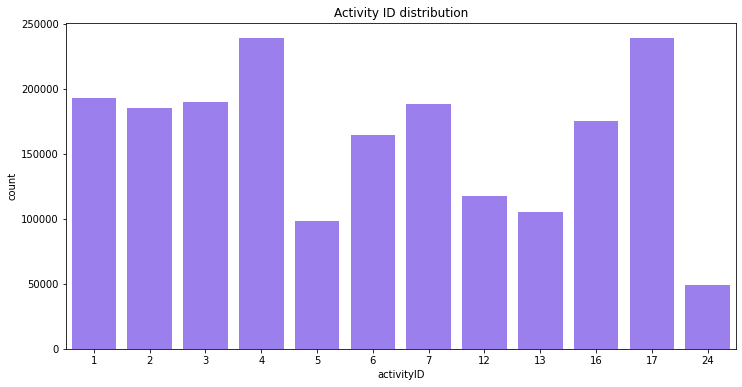

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x = imu_data.activityID, color=colour)
plt.title('Activity ID distribution');

Before splitting, we do a quick visualisation of our activityID column, we see that the data is not well balanced and splitting randomly can lead to undersampling of certain activities like activity 24 in out train or test data. We will use stratified sampling to split the dataset, by stratifying on the activityID.

In [23]:
# imu_data.groupby('activityID').apply(lambda group: len(group))
train = pd.DataFrame()
test = pd.DataFrame()
for id in imu_data.activityID.unique():
    subject = imu_data.query(f"activityID == {id}")
    train_sub = subject.sample(frac = 0.8, random_state = 95)
    test_sub = subject.drop(train_sub.index)
    train = train.append(train_sub)
    test = test.append(test_sub)

In [24]:
print(f'The training dataset contains {train.shape[0]} observations')
print(f'The training dataset contains {test.shape[0]} observations')

The training dataset contains 1554297 observations
The training dataset contains 388575 observations


#### Train Data Exploration

In [25]:
train.describe(include='all')

,timestamp,activityID,heart_rate,hand_temp,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_gyro_1,hand_gyro_2,hand_gyro_3,hand_magnet_1,hand_magnet_2,hand_magnet_3,chest_temp,chest_acc16_1,chest_acc16_2,chest_acc16_3,chest_gyro_1,chest_gyro_2,chest_gyro_3,chest_magnet_1,chest_magnet_2,chest_magnet_3,ankle_temp,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_gyro_1,ankle_gyro_2,ankle_gyro_3,ankle_magnet_1,ankle_magnet_2,ankle_magnet_3,subject_id,activity,resting_hr,heart_rate_change
count,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1554297,1554297,1.554297e+06,1.554297e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,Walking,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218071,191009,NaN,NaN
mean,1.705273e+03,8.081831e+00,1.074740e+02,3.275110e+01,-4.953831e+00,3.581821e+00,3.602077e+00,9.938912e-04,3.974106e-02,-3.868743e-03,2.114532e+01,-1.395079e+01,-2.437103e+01,3.617927e+01,3.332074e-01,8.151991e+00,-1.450828e+00,5.883133e-03,1.180714e-02,-2.288212e-02,4.467922e+00,-3.064485e+01,4.578552e+00,3.371217e+01,9.405558e+00,-1.594689e-01,-2.591620e+00,9.796274e-03,-3.655998e-02,6.831801e-03,-3.157651e+01,1.389670e+00,1.725277e+01,NaN,NaN,6.649834e+01,6.250214e-01
std,1.093573e+03,6.174788e+00,2.698137e+01,1.794530e+00,6.240768e+00,6.883983e+00,3.951898e+00,1.331773e+00,9.558385e-01,1.598141e+00,2.378771e+01,2.422311e+01,2.006128e+01,1.494946e+00,1.741421e+00,4.885286e+00,4.763239e+00,4.494153e-01,5.642077e-01,3.174567e-01,1.703619e+01,1.752088e+01,2.157893e+01,1.092177e+00,6.522777e+00,7.743277e+00,3.922996e+00,1.127581e+00,6.384401e-01,2.013823e+00,1.833662e+01,2.168040e+01,1.969723e+01,NaN,NaN,6.202879e+00,4.170886e-01
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.147550e+02,-1.043010e+02,-1.014520e+02,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.035600e+02,-2.000430e+02,-1.649370e+02,3.193750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-1.252510e+01,-5.068580e+00,-4.260240e+00,-6.966740e+01,-1.223430e+02,-6.668470e+01,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.436770e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,NaN,NaN,5.400000e+01,-1.724138e-02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970930e+00,1.057450e+00,1.162540e+00,-3.781160e-01,-2.240780e-01,-3.858340e-01,4.858500e+00,-2.906290e+01,-3.869070e+01,3.518750e+01,-5.136240e-01,5.947030e+00,-4.205040e+00,-1.094110e-01,-1.364400e-01,-1.311720e-01,-6.093110e+00,-3.990800e+01,-9.822410e+00,3.300000e+01,8.425630e+00,-2.174560e+00,-3.810750e+00,-2.086070e-01,-1.065750e-01,-4.415000e-01,-4.171210e+01,-1.249970e+01,3.809990e+00,NaN,NaN,6.000000e+01,2.714286e-01
50%,1.480240e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.451980e+00,3.526650e+00,3.430790e+00,-5.910700e-03,5.927130e-03,-5.636950e-03,2.295000e+01,-1.611740e+01,-2.387470e+01,3.643750e+01,4.395930e-01,9.197390e+00,-1.462040e+00,2.813320e-03,6.750770e-04,-1.684970e-02,2.696290e+00,-3.343750e+01,2.966710e+00,3.406250e+01,9.537990e+00,-2.915500e-01,-2.418220e+00,4.582750e-03,-3.999510e-03,-2.318750e-03,-3.399760e+01,7.684030e-01,1.878000e+01,NaN,NaN,6.600000e+01,6.142857e-01
75%,2.664110e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.588330e-01,6.450960e+00,6.530560e+00,3.368500e-01,2.673640e-01,3.679130e-01,3.938640e+01,2.161130e+00,-1.

The display above provides statistical insight about our training data, we can see the heart rate ranges from 57bpm up to 202bpm, with a mean bpm of 107. Interestingly, according to the [NHS](https://www.nhs.uk/common-health-questions/accidents-first-aid-and-treatments/how-do-i-check-my-pulse/#:~:text=Most%20adults%20have%20a%20resting,rate%20is%20likely%20to%20be.), the average resting bpm of an average adult is between 60 and 100 but reduces the fitter you are and much lower for athlethes.  Very low values are seen for minimum temperature from each IMU, this is interesting as you would expect temperature to increase during exercising or physical activities. We can also see that walking was the most common activity in the data provided.

##### *Correlation*

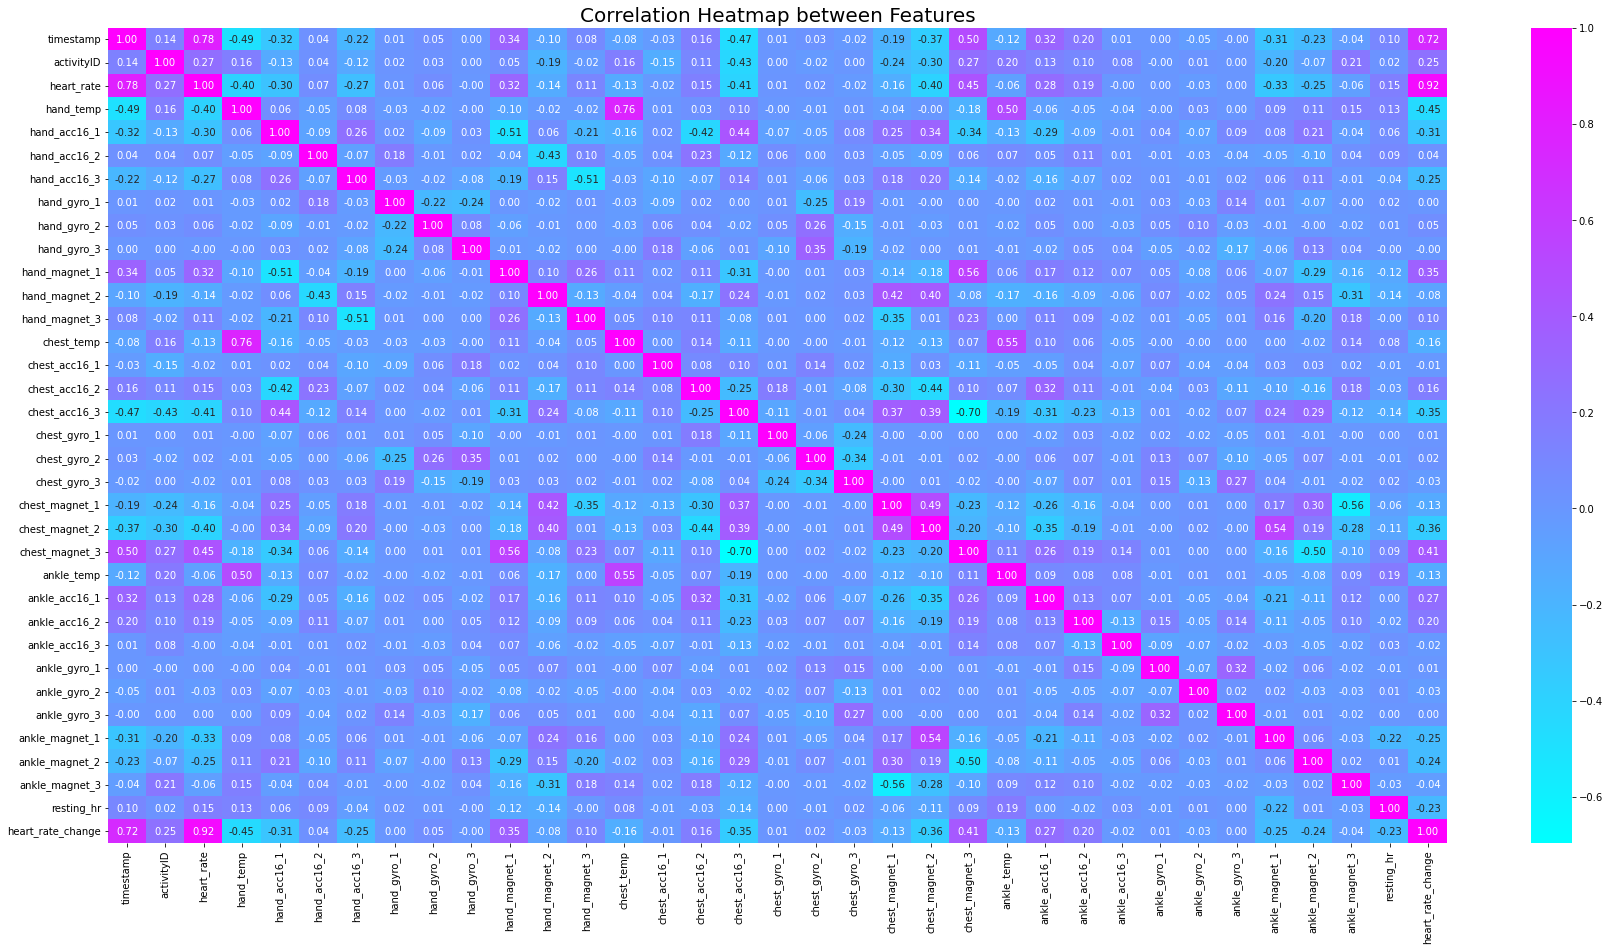

In [26]:
# plot correlation map
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), cmap = 'cool', annot = True, annot_kws={"size":10}, fmt = '.2f')
plt.title('Correlation Heatmap between Features', fontsize=20);

The correlation chart aboves shows that there is almost no meaningful interaction between our features. Some of the strongest correlation can be found between timestamp and heart rate, you would expect this as the longer you engage in a physical activity, the higher/faster your heart rate would be & heart rate and heart rate change. Also, strong negative correlation between Chest magnet(3) and Chest acceleration 16g (3).

Some correlation was observed between temperature features, with Chest temperature and Hand Temperature having the strongest correlation. The other relationships were found to be weak with a minimum of 0.50.

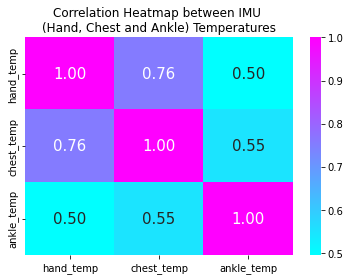

In [27]:

sns.heatmap(imu_data.filter(regex='temp').corr(), cmap = 'cool', annot = True, annot_kws={"size":15}, fmt = '.2f')
plt.title('Correlation Heatmap between IMU \n(Hand, Chest and Ankle) Temperatures');

##### *Heart Rate Distribution/Dispersion*

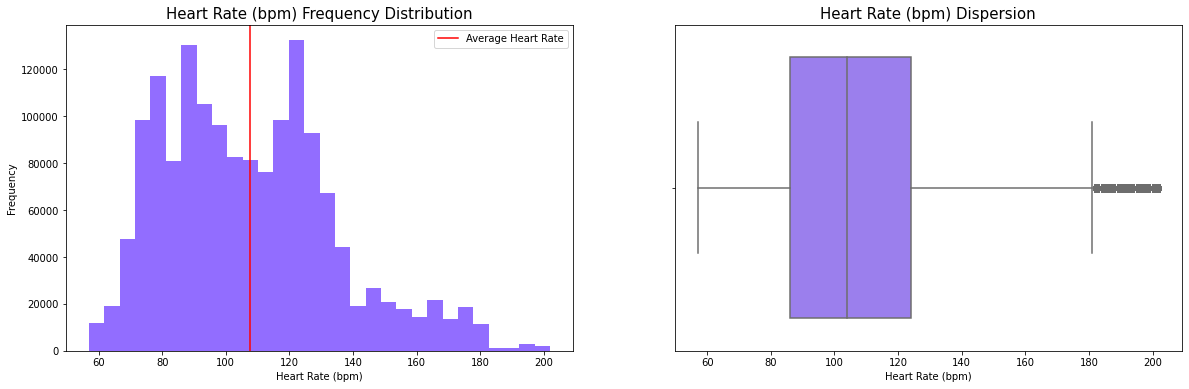

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.hist(x = train["heart_rate"], bins = 30, color = colour)
plt.axvline(x = train["heart_rate"].mean(), color = 'r', label = 'Average Heart Rate')
plt.title('Heart Rate (bpm) Frequency Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Heart Rate (bpm)')
plt.legend(loc = 'best')


plt.subplot(1, 2, 2)
sns.boxplot(x = train["heart_rate"], color = colour)
plt.title('Heart Rate (bpm) Dispersion', fontsize=15)
plt.xlabel('Heart Rate (bpm)');


The plots above show us that Heart Rate appears to be multi-modal peaking at around 90bpm and also 124bpm. Could this represent the average bpm for resting and physical activity of the data? Most of the heart rate reported fall in the 4th Quartile of of the data. We can also see that heart rate is right skewed with outliers over 180 bpm, which appear to not be much. 

##### *Heart Rate vs Subject ID and Activity*

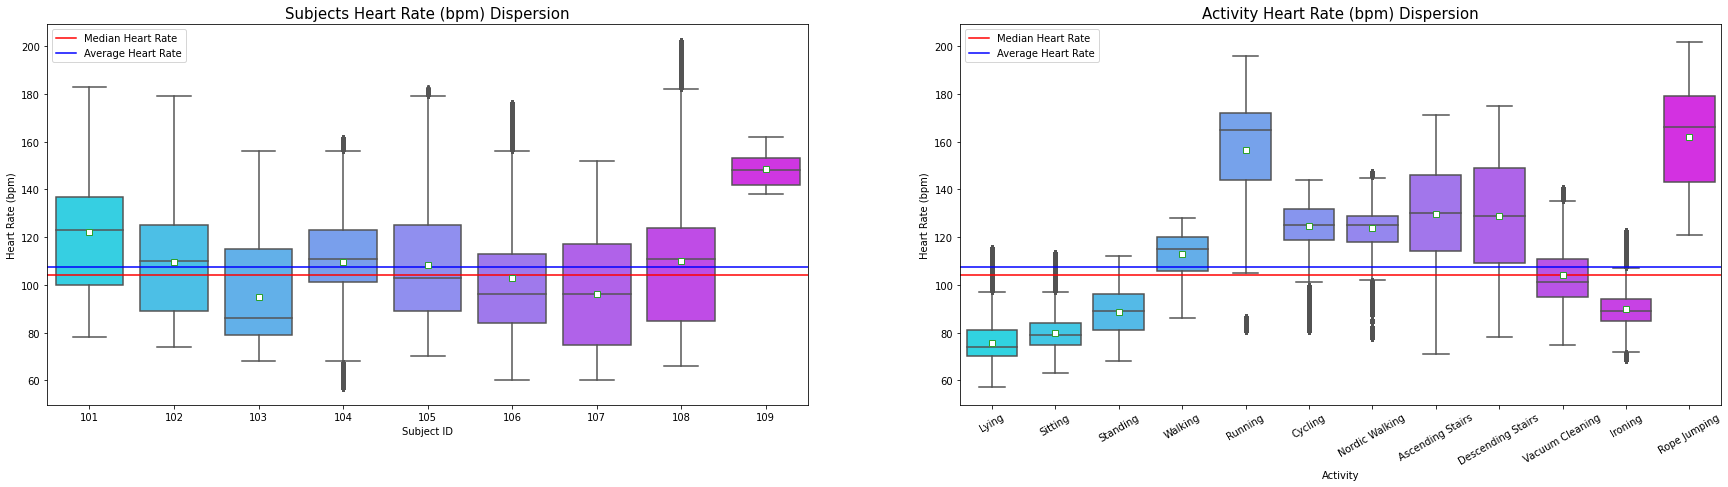

In [29]:
plt.figure(figsize=(30,7))

plt.subplot(1,2,1)
sns.boxplot(data=train, x='subject_id', y='heart_rate', palette = 'cool', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
plt.axhline(y = train["heart_rate"].median(), color = 'r', label = 'Median Heart Rate')
plt.axhline(y = train["heart_rate"].mean(), color = 'b', label = 'Average Heart Rate')
plt.title('Subjects Heart Rate (bpm) Dispersion', fontsize=15)
plt.xlabel('Subject ID')
plt.ylabel('Heart Rate (bpm)')
plt.legend(loc = 'best')


plt.subplot(1,2,2)
sns.boxplot(data=train, x='activity', y='heart_rate', palette = 'cool', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
plt.axhline(y = train["heart_rate"].median(), color = 'r', label = 'Median Heart Rate')
plt.axhline(y = train["heart_rate"].mean(), color = 'b', label = 'Average Heart Rate')
plt.title('Activity Heart Rate (bpm) Dispersion', fontsize=15)
plt.xlabel('Activity')
plt.xticks(rotation=30)
plt.ylabel('Heart Rate (bpm)')
plt.legend(loc = 'best');

The plots above shows us how heartbeat varies between subjects and between activites.  
All subjects except subject 109 experienced heartbeat rates between 80bpm and 150bpm when carrying out their activities. Subject 109 had a very small range of beat per minute, this is as a result of only one activity, 'Rope Jumping', being recorded for him. We can also see how the means and median for each subject differs from the overall mean and median. Only subjects 103, 105 and 106 have their heart rate means vary significantly from their repesctive heart rate median, insterestingly, the means are all higher than their medians. We can also deduce that excluding subject 109, subject 101 had the highest average heart rate. subject 101 appears to be theleast fit person of all the subjects.  

The **Activity Heart Rate** shows that Lying, Sitting, Standing and Ironing require the least amount of energy as they have the lowest spread, mean and median beat per minute. Closer look at the plot shows that Running, Rope Jumping, Walking and Ascending  Stairs have longer First Quartile tails, this can be explained by the fact that these activities are usually started at a lower pace before gradually increasing. Running and Rope Jumping have the largest mean and median beat per minute which implies they require the most energy, as heart rate increases the more physically demanding an activity is.

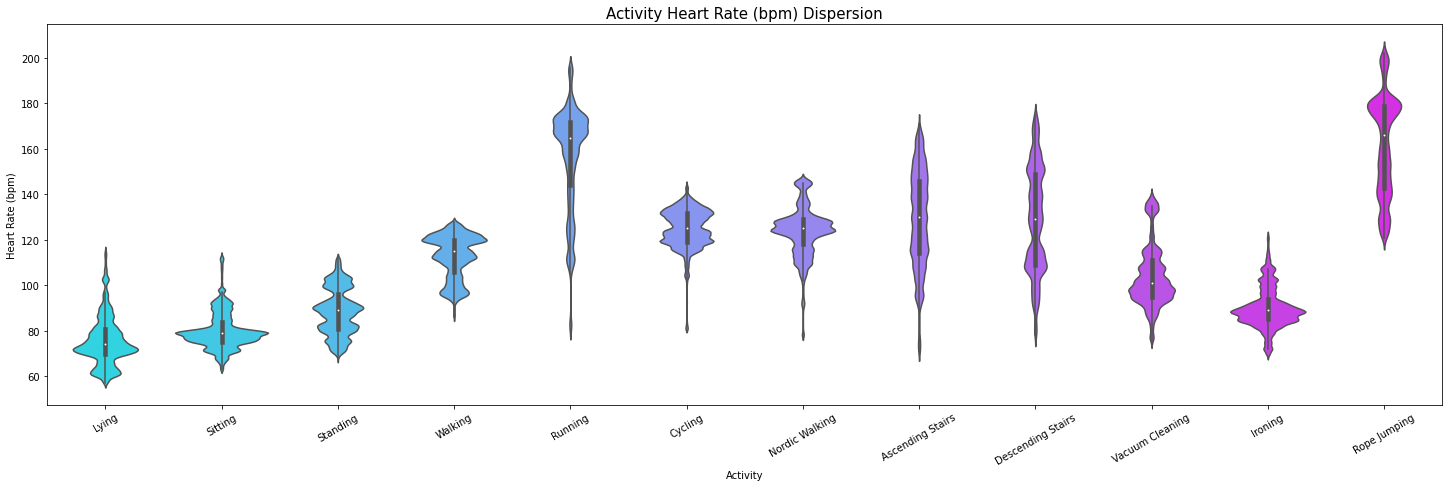

In [30]:
# sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
# sns.set_context('notebook')
# sns.set_style("ticks")
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

plt.figure(figsize=(25,7))

# plt.subplot(1,2,1)
# sns.violinplot(data=train, x='subject_id', y='heart_rate', palette = 'cool', showmeans=True)
# plt.title('Subjects Heart Rate (bpm) Dispersion')
# plt.xlabel('Subject ID')
# plt.ylabel('Heart Rate (bpm)')

# plt.subplot(1,2,2)
sns.violinplot(data=train, x='activity', y='heart_rate', palette = 'cool')
plt.title('Activity Heart Rate (bpm) Dispersion', fontsize=15)
plt.xlabel('Activity')
plt.xticks(rotation=30)
plt.ylabel('Heart Rate (bpm)');

The violin plot above shows how much of an activity was carried out while expeiriencing a certain heart beat rate. Again we see Lying, Sitting and Ironing activies had most of the heart beat rate around their respective median i.e on average you would expect the heart rate to be around these numbers. Nordic Walking also displays this pattern.  
We can see that Running, Rope Jumping, Acsending Stairs and Descending Stairs have less concentration of heart rate at any particular number, this would be due how physically demanding these activities are. Although, there's a small concentration of high heart beat rate for Running and Rope Jumping, this would signify the maximum heart beat rate of most subjects during both activities.

##### *Heart Rate vs Subject ID vs Activity*

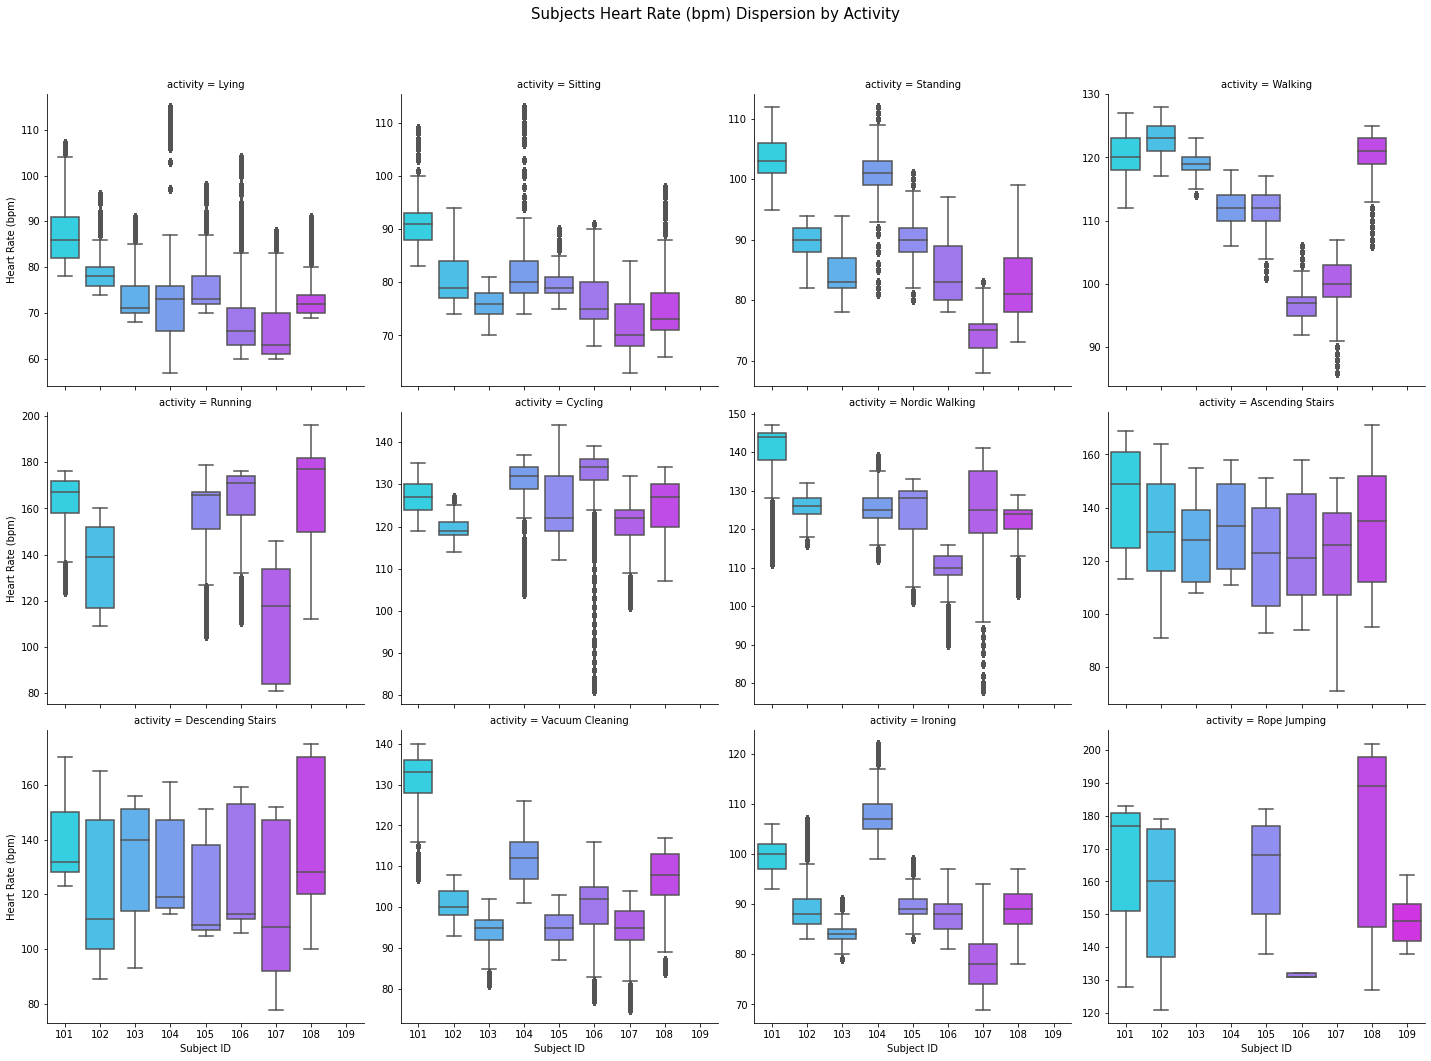

In [31]:
# create facet plots
g = sns.FacetGrid(train, col='activity', col_order=activity_order, col_wrap=4, sharey=False, height=5)
g.map(sns.boxplot, 'subject_id', 'heart_rate', palette='cool', order=subject_order)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Subjects Heart Rate (bpm) Dispersion by Activity', fontsize=15)
g.set_ylabels('Heart Rate (bpm)')
g.set_xlabels('Subject ID');

The plot above details how each subjects heart rate compared to each other when performing the same activities. We see veyr clear differences in how subjects hearts respond to Walking, Vacuum Cleaning and Ironing. Looking at the different facets confirms how subject 101 consistently had high heart beat rate compared to the others confirming he was the least fit subject in this experiment.  
An interesting observation, all subjects except 103 have low medians compared to the varying diiferent heart beat rate they each experience.

##### *Heart Rate Change*

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


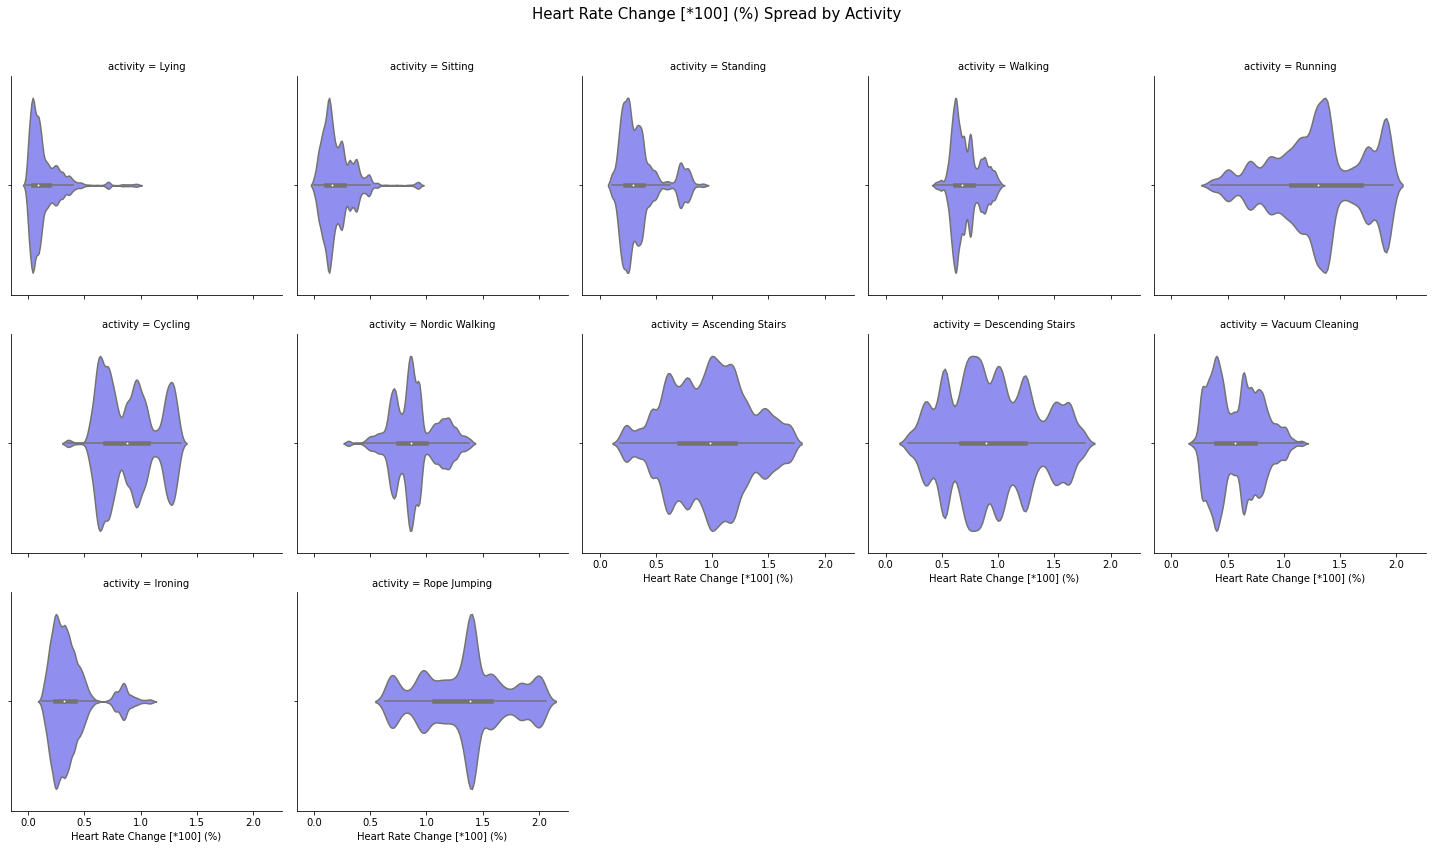

In [32]:
g = sns.FacetGrid(train, col='activity', col_wrap=5, sharey=False, height=4)
g.map(sns.violinplot, 'heart_rate_change', palette='cool')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Heart Rate Change [*100] (%) Spread by Activity', fontsize=15)
g.set_xlabels('Heart Rate Change [*100] (%)');

##### *Average Heart Rate Change*

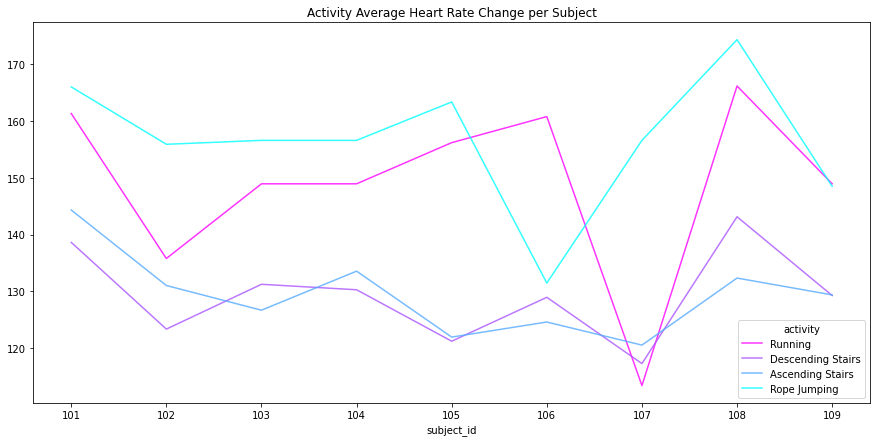

In [33]:
average_heart_rate_change = pd.crosstab(train.subject_id, train.activity, train.heart_rate, aggfunc='mean')
average_heart_rate_change.fillna(average_heart_rate_change.mean(axis=0))[['Running', 'Descending Stairs', 'Ascending Stairs', 'Rope Jumping']].plot(kind='line', alpha=0.8, 
                                                                                                                        title ="Activity Average Heart Rate Change per Subject",
                                                                                                                        cmap='cool_r',
                                                                                                                        figsize=(15,7));

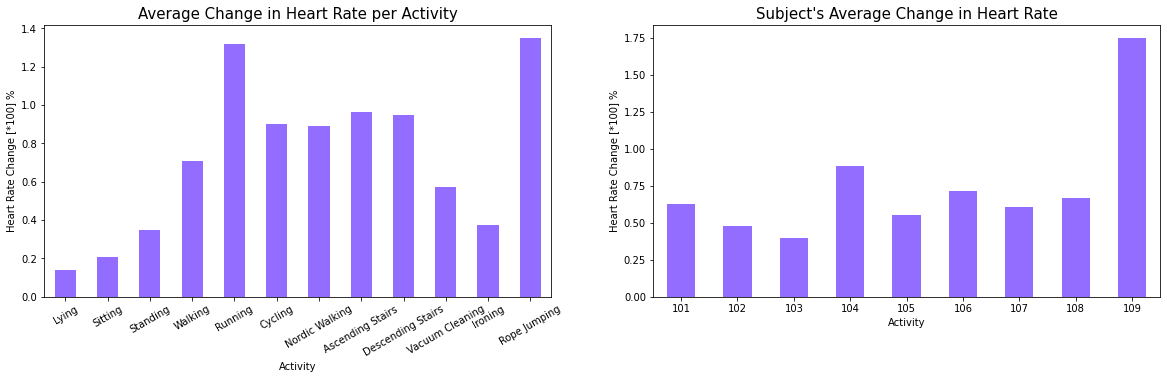

In [34]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
train.groupby('activity')['heart_rate_change'].mean().plot(kind='bar', color = colour)
plt.title('Average Change in Heart Rate per Activity', fontsize=15)
plt.xlabel('Activity')
plt.xticks(rotation=30)
plt.ylabel('Heart Rate Change [*100] %');

plt.subplot(1,2,2)
train.groupby('subject_id')['heart_rate_change'].mean().plot(kind='bar', color = colour)
plt.title('Subject\'s Average Change in Heart Rate', fontsize=15)
plt.xlabel('Activity')
plt.xticks(rotation=0)
plt.ylabel('Heart Rate Change [*100] %');

Taking the average of the percentage change in heart rate, we see that Rope Jumping and Running still appear to be the most stressfull. On avearge subjects experience at least double their normal resting heart rate when performing these two activities.  

From the average percentage change in heart rate for each subject we see that subject 109 had the highest due to him performing only the Jump Rope activity. We can also see that other subjects have much lower average change in heart rate, this would be as a result of the less stressful activities negating the effects Rope Jumping on the heart rate average.

##### *Max Heart Rate per Subject*

In [35]:
train.loc[train.groupby(['subject_id'], sort=False)['heart_rate'].idxmax()][['subject_id', 'activity', 'heart_rate']]

,subject_id,activity,heart_rate
361742,101,Rope Jumping,183.0
798905,102,Rope Jumping,179.0
1013336,103,Descending Stairs,156.0
1263907,104,Descending Stairs,161.0
1780604,105,Rope Jumping,182.0
2126547,106,Running,176.0
2321638,107,Descending Stairs,152.0
2852427,108,Rope Jumping,202.0
2463941,109,Rope Jumping,162.0


The display above shows what activity each subject was carrying when they reached their highest heart rate recorded. We can see that most subjects experience the most physical exertion when performing Rope Jumping exercises. This also back our earlier assumptions.  

Subjects who had their highest recorded heart rate when performing other activities (not rope jumping) did not partake in the rope jumping activity.

##### *Temperature*

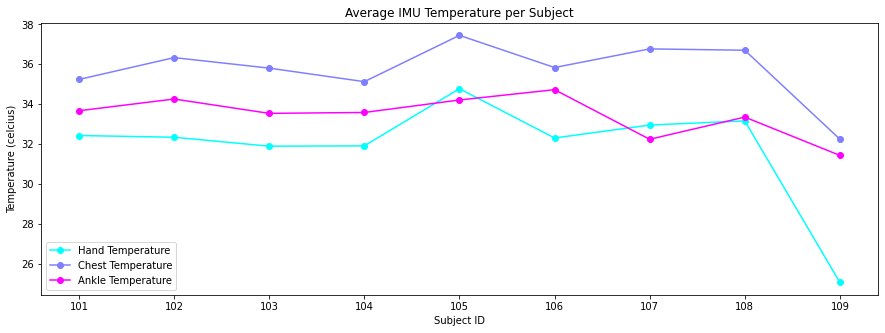

In [36]:
train.groupby(['subject_id'])[['hand_temp', 'chest_temp', 'ankle_temp']].mean().plot(marker='o', cmap='cool', figsize=(15,5))
plt.title('Average IMU Temperature per Subject')
plt.xlabel('Subject ID')
plt.ylabel('Temperature (celcius)')
plt.legend(['Hand Temperature', 'Chest Temperature', 'Ankle Temperature']);

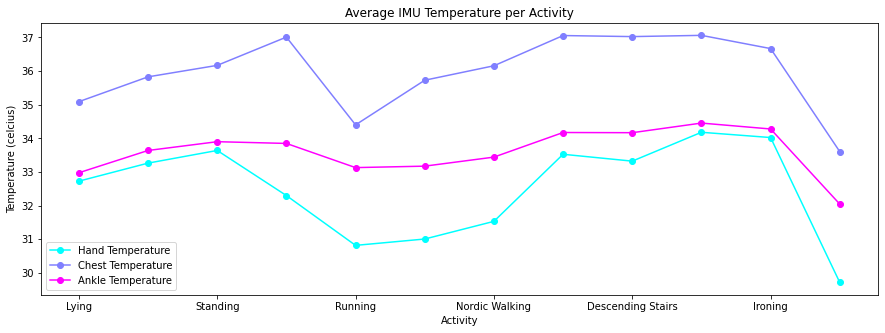

In [37]:
train.groupby(['activity'])[['hand_temp', 'chest_temp', 'ankle_temp']].mean().plot(marker='o', cmap='cool', figsize=(15,5))
plt.title('Average IMU Temperature per Activity')
plt.xlabel('Activity')
plt.ylabel('Temperature (celcius)')
plt.legend(['Hand Temperature', 'Chest Temperature', 'Ankle Temperature']);

Ascending stairs, Descending Stairs, Vacuum Cleaning and Ironing temperatures for Hand, Chest and Ankle consistenly have higher mean tempeartures than the overall mean tempeartures. They consistently also a smaller range of temperature compared to the other activities.

## Hypothesis Testing

For Hypothesis testing we would expect to compare Rope Jumping and Running as they appear to be the most stressfull activities, but since not all subjects performed these activities I believe we would not have a truly accurate representation of what's happening. We would also be using percentage change in heart rate since I believe that by how much a subject's heart rate changes will be the best representation of how physically demanding an activity is.     

For this reason we would look at Ascending stairs and Descending stairs, all the subjects took part in both activities. Their Heart Rate and percentage change distribution, mean, median seem really close. From the EDA on our test data, we observed that on average while performing Ascending, subjects heart rate increased by 96.5885% compared to Descending which subjects experience an increase in heart by 94.7385%. This tells us that while close, Ascending Stairs is the more stressful activity and we would attempt to validate this with the help of a Statistical Hypothesis test.  


**Hypothesis**
>*`If a higher change in heart rate is a good representation of how intensive an activity is, then activities that increase heart rate a lot are more physically intensive than activities that increase heart rate by little change.`*  
**Is Ascending stairs significantly physically more intensive than Descending stairs i.e On avearge, does Ascending stairs cause a higher change in heart rate than Descending stairs ?**  

>$H_0$ : The mean heart rate while Ascending stairs is **NOT** higher than the average heart rate change while descending stairs.  
$$\begin{align}
\mu_a =< \mu_d \\
\mu_a - \mu_d <= 0
\end{align}$$
$H_a$ : The average heart rate change while Ascending stairs is higher than the average heart rate change while descending stairs. 
$$\begin{align}
\mu_a > \mu_d\\
\mu_a - \mu_d > 0  
\end{align}$$

To carry out the Z-test, we will first need to calculate the mean and standard deviation of the heart rate change for both ascending and descending stairs. We will then use these values to calculate the Z-score, which will tell us how many standard deviations the mean heart rate change for ascending stairs is from the mean heart rate change for descending stairs. We will then use this value to get the p_value how probable our result is as dependent on chance.

Because our test data consists of size greater than 30 $(n > 30)$, we will implement a Z-test for this experiment. We shall also be setting a significance level of 5% $(\alpha = 0.05)$.



In [38]:
# define a function to return mean, std and size of columns of interest
def get_grouped_agg(data, group, value):
    average = data.groupby(group)[value].mean()
    std = data.groupby(group)[value].std()
    size = data.groupby(group)[value].count()

    return average, std, size

In [39]:
# get statistics for test data
test_activity_mean, test_activity_std, test_activity_count = get_grouped_agg(test, 'activity', 'heart_rate_change')

In [40]:
# calculate mean difference
sample_mean_diff = test_activity_mean['Ascending Stairs'] - test_activity_mean['Descending Stairs']

# Calculate combined error
ascending_error = (test_activity_std['Ascending Stairs']**2)/test_activity_count['Ascending Stairs']
descending_error = (test_activity_std['Descending Stairs']**2)/test_activity_count['Descending Stairs']
combined_error = np.sqrt(ascending_error + descending_error)

# calculate z-score
z_score = (sample_mean_diff - 0)/combined_error

# Calculate P Value
p_value = (1-stats.norm.cdf(z_score))
print (f'The one tail Hypothesis has a p value of {p_value}')

The one tail Hypothesis has a p value of 0.0006891572262405221


The p-value gotten above shows that we can reject our null hypothesis that Descending stairs is more intensive physically than Ascending stairs.  

With the result gotten from the experiment above, we can say with statistical authority that Ascending stairs activity is significantly more intensive than Descending stairs activity. Even at significance level as low as 0.1% $(\alpha = 0.001)$, we shall still reject the null hypothesis. This actually backs the logical assumption that Ascending stairs is harder than Descending stairs.

## Modelling

In this stage of the analysis we would be looking to build a model that can predict the what activities are being carried out based on some information given to it.  

While there are probably better algorithms to build our model around, we will be focusing on only concepts which have been introduced to us throughout this semester.

#### Pre-processing

In [41]:
# create train values
y_train = train['activityID']
x_train = train.drop(['timestamp', 'activityID', 'subject_id', 'activity', 'resting_hr', 'heart_rate_change'], axis=1)

# create test values
y_test = test['activityID']
x_test = test.drop(['timestamp', 'activityID', 'subject_id', 'activity', 'resting_hr', 'heart_rate_change'], axis=1)

In [42]:
# perform Z-Normaliser transformation on test and train data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Dimensionality Reduction

In [43]:
# get explained variance varying number of features
explained_variance = []

for i in range(1, x_train.shape[1]+1):
    pca = PCA(n_components = i)
    pca.fit(x_train)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

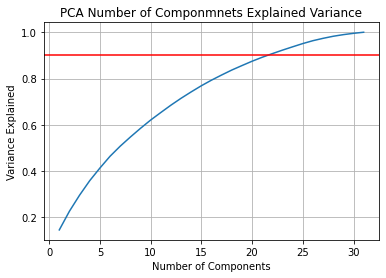

In [44]:
plt.plot(range(1, x_train.shape[1]+1), explained_variance)
plt.axhline(0.9, color="red")
plt.title("PCA Number of Componmnets Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()

The above plot displays how performing Principal Component Analysis on our data would affect how much variance in our data can be explained. This invariably tells us how we should expect any model to perform on decomposed data.  

We can see that decomposing the number of features in our dataset to a minimum of 16 features, a minimum of 80% of the variance in the data can still be explained.

#### Model Training

##### *Linear Regression*

In [57]:
# Build a linear regression model on our dataset while increasing the number of components for Dimensionality reduction
RMSE = []
MEA = []
R_square = []
components = []

for i in range(16, x_train.shape[1]+1):
    components.append(i)

    # instantiate, fit and transform using PCA
    pca = PCA(n_components = i)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    # perform linear regression on PCA transformed data
    lin_model = LinearRegression()
    lin_model.fit(x_train_pca, y_train)

    # model prediction
    test_pred_pca = lin_model.predict(x_test_pca).round()

    # calculate error terms
    lin_rmse = np.sqrt(mean_squared_error(y_test, test_pred_pca))
    lin_mea = mean_absolute_error(y_test, test_pred_pca)
    r2 = r2_score(y_test,test_pred_pca)

    RMSE.append(lin_rmse)
    MEA.append(lin_mea)
    R_square.append(r2)

    # print(f'The Root Mean Square Error of the Linear Regression Model with {i} components is {lin_rmse}')
    # print(f'The Mean Absolute Error of the Linear Regression Model with {i} components is is {lin_mea}')

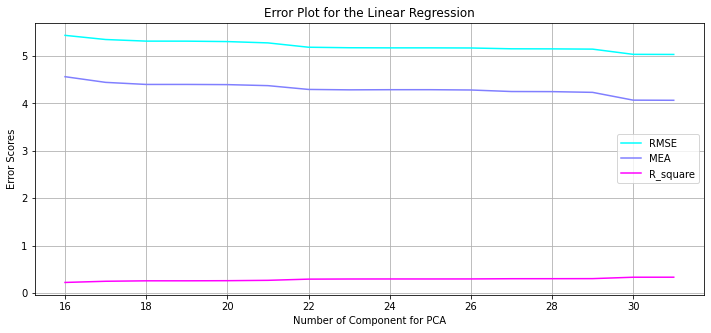

In [58]:
# combine the RMSE and MAE into a dataframe
Linear_regression_error_data = pd.DataFrame({'Num of Components':components, 'RMSE': RMSE, 'MEA':MEA, 'R_square':R_square}).set_index('Num of Components')

# Create plot for the error values
Linear_regression_error_data.plot(figsize=(12, 5), cmap='cool')
plt.title('Error Plot for the Linear Regression')
plt.xlabel('Number of Component for PCA')
plt.ylabel('Error Scores')
plt.grid();

In [59]:
Linear_regression_error_data

,RMSE,MEA,R_square
Num of Components,,,
16,5.434017,4.562890,0.225544
17,5.346384,4.443034,0.250321
18,5.312373,4.399272,0.259829
19,5.311729,4.399485,0.260008
20,5.302823,4.395481,0.262488
21,5.275127,4.374087,0.270172
22,5.183772,4.294093,0.295231
23,5.172887,4.285456,0.298188
24,5.170343,4.288382,0.298878


Here we investigate how dimensionality reduction of our dataset affects our model peformace. We use Root Mean Square Error and Mean Absolute Error as the scoring metrics to determine how effective our model is.  

As with the PCA plot from before, we can see that while the Linear Regression is not exactly great at predicting (we have high scores from both evaluation metrics) what activities are being carried out based on the information provided to it, it performs best when all of the dimensions are provided without decomposing.

The plot above also shows our to evaluation metrics to be following the exact same path. so at every number of features, the difference in the two error scores is constant.

##### *Logistic Regression*

For this model design, we would ignore PCA as we have already seen that performing decomposition on our dataset does damage to the performance of the model due it losing the ability to explain a decent amount of variance in our dataset without almost the whole data.

In [47]:
# define a function that outputs a string with different metric scores for Logistic Regression
def log_reg_metric_scores (true_values, predicted_values):
    accuracy = accuracy_score(true_values, predicted_values)
    error = 1 - accuracy
    precision = precision_score(true_values, predicted_values, average=None).mean()
    recall = recall_score(true_values, predicted_values, average=None).mean()
    f1 = f1_score(true_values, predicted_values, average=None).mean()
    
    metrics = {'Accuracy':accuracy, 'Error':error, 'Precision':precision, 'Recall':recall, 'F1':f1}

    for metric, score in metrics.items():
        print(f"The {metric} score for the Logistic Regression model is {score:.3f}.")

    return metrics

In [48]:
# Instantiate Logistic regression model
log_reg = LogisticRegression(max_iter= 300)
log_reg.fit(x_train, y_train)
test_pred_lr = log_reg.predict(x_test)

# Calculate performance metrics
values = log_reg_metric_scores(y_test, test_pred_lr)

The Accuracy score for the Logistic Regression model is 0.822.
The Error score for the Logistic Regression model is 0.178.
The Precision score for the Logistic Regression model is 0.799.
The Recall score for the Logistic Regression model is 0.786.
The F1 score for the Logistic Regression model is 0.791.


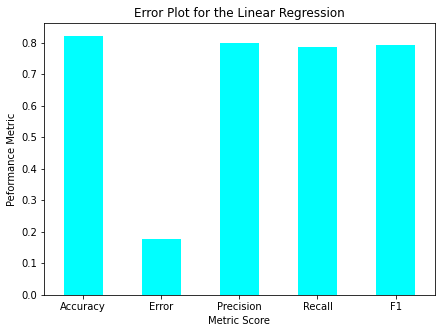

In [49]:
# Create a plot showing the performance metrics for the Logistic regression
pd.DataFrame(values, index=[0]).T.plot(kind ='bar', cmap='cool', figsize=(7,5), legend=None)
plt.title('Error Plot for the Linear Regression')
plt.xlabel('Metric Score')
plt.ylabel('Peformance Metric')
plt.xticks(rotation=0);

From the above results and plots, we can see that the Logistic regression model performs much better than the Linear Regression model on unseen data.  

The Logistic regression model was able  to correctly classify over 82% of unseen data (test data). In terms of Precision, the model was also able to correctly classify relevant labels where they belonged at a pretty good rate of 79.9%. Overall, all these accuracy scores show that Logistic Regression is a better model to use in making activity predictions PAMAP data.

## Summary & Conclusion

In this report, we explored the PAMAP2 dataset and aimed to draw insights into how measurements and readings taken from subjects while carrying out various activities can be used to predict how active an individual is. We started by cleaning the data, dropping invalid columns and filling missing values. These missing values were handled by forward and backward filling for the heart rate column and interpolating for other columns. Orientation features were also dropped because they contained invalid data. We then split the data into training and testing sets using stratified sampling to ensure balance in the distribution of activities.

Exploratory data analysis was carried out on the training data, revealing that the heart rate is multi-modal and right skewed, with subjects 101 and 109 having the highest and lowest average heart rates respectively. During the exploration of the training data, we found that heart rate appears to be multi-modal and skewed right with outliers above 180 bpm. We also observed that subject 109 had a very small range of beat per minute due to only having one recorded activity, while subject 101 had the highest average heart rate and appeared to be the least fit of all the subjects. Furthermore, we found that activities such as running, rope jumping, walking and ascending stairs have longer first quartile tails and higher mean and median beat per minute, indicating that they require more energy. It was also found that activities such as lying, sitting and ironing have the lowest spread, mean and median heart rate.

We also found that most of the features have weak or no correlations with each other, with the exception of a few such as heart rate and heart rate change, and chest magnet(3) and chest acceleration 16g (3). We also observed that temperature features have some correlation, with chest temperature and hand temperature having the strongest.

Hypothesis Testing was also carried out on the train data to be validated using test data. Our alternate Hypothesis was given as **Ascending stairs significantly physically more intensive than Descending stairs i.e On avearge, does Ascending stairs cause a higher change in heart rate than Descending stairs**. We performed a One tailed Z-test for this experiment with a significance level of 0.05, from the experiment we were able to reject the null hypothesis and accept the null hypothesis. This helped validated the insights drawn from the data. 

In our modeling stage, we fitted and tested a linear regression model on the training data to predict heart rate change while varying the number of components using Principal Component Analysis, testing on test/unseen data. The model achieved best RMSE score of 5.031, best MAE of 4.065 and obtained best R^2 score of 0.3359, indicating poor prediction performance. Both linear and logistic regression models were used, with logistic regression performing better with an accuracy of 82% and precision of 79.9%. It was also found that dimensionality reduction did not improve the performance of the models.
Other modelling techniques were attempted like Polynomial Regression, KMeans and KNN, these algorithms appeared to be to powerful for my machine and either took toolong to run or crashed my computer by running out of RAM memory.

>In conclusion, the logistic regression model is the better choice for predicting activities in the PAMAP2 dataset, with the best performance being achieved when all dimensions are used without decomposition. The heart rate feature from the dataset is also a good predictor of how intensive an activity is as shown by the experiment carried out in for Hypothesis Testing.

>We recommend further analysis and modeling on the PAMAP2 dataset to improve the prediction performance of heart rate change and potentially create a marketable product based on this information. It may also be useful to include additional data or sensors to strengthen the predictive power of the models. Further improvement of the model could be achieved by using more advanced algorithms or collecting more diverse and balanced data. Also, a more powerful machine should be considered to carry out the modelling while testing other advanced techniques.

